# Intelligent Agents: Reflex-Based Agents for the Vacuum-cleaner World


## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file. 

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex-based agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square in the room has been cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [22]:
import numpy as np

actions = ["north", "east", "west", "south", "suck"]

def simple_randomized_agent(bumpers, dirty):
    return np.random.choice(actions)

ModuleNotFoundError: No module named 'numpy'

In [ ]:
# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty = True

# call agent program function with percepts and it returns an action
simple_randomized_agent(bumpers, dirty)

'west'

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

We implement a simple simulation environment that supplies the agent with its percepts.
The simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns a performance measure which is here the number of cleaned squares (since the room is infinite and all squares are constantly dirty, the agent can never clean the whole room as required in the PEAS description above). The energy budget of the agent is specified as `max_steps`. 

In [ ]:
def simple_environment(agent, max_steps, verbose = True):
    num_cleaned = 0
    
    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action) 
        
        if (action == "suck"): 
            num_cleaned = num_cleaned + 1
        
    return num_cleaned
        


Do one simulation run with a simple randomized agent that has enough energy for 20 steps.

In [ ]:
simple_environment(simple_randomized_agent, max_steps = 20)

step 0 - action: east
step 1 - action: suck
step 2 - action: east
step 3 - action: north
step 4 - action: east
step 5 - action: west
step 6 - action: north
step 7 - action: east
step 8 - action: south
step 9 - action: east
step 10 - action: west
step 11 - action: west
step 12 - action: south
step 13 - action: suck
step 14 - action: west
step 15 - action: west
step 16 - action: west
step 17 - action: south
step 18 - action: suck
step 19 - action: south


3

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formated professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.


## Task 1: Implement a simulation environment [20 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty. ([Help with random numbers and arrays in Python](https://github.com/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/random_numbers_and_arrays.ipynb))
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment should be a function like the `simple_environment()` and needs to work with the simple randomized agent program from above. **Use the same environmnt for all your agent implementations in the tasks below.**

*Note on debugging:* Debugging is difficult. Make sure your environment prints enough information when you use `verbose = True`. Also, implementing a function that the environment can use to displays the room with dirt and the current position of the robot at every step is very useful.  

In [ ]:
import numpy as np 
import math 
    
# pass agent, room size, randomized room and location, max steps
def simple_environment(agent, room_size, room_and_location, max_steps, verbose = True): 
    # make a copy of the room
    room = room_and_location[0]
    record_room = np.copy(room)
    # get the x and y coordinates of the sqaure location
    x = room_and_location[1][0]
    y = room_and_location[1][1]
    # default the number of cleaned square and cost
    num_cleaned = 0
    num_cost = 0
    # default the memory of model base reflex agent
    reach_start = False
    count_y = 0
    track = [reach_start ,count_y]
    #print(record_room) 

    # loop unitl reach the agent's max steps
    for i in range(max_steps):
        # check if the room has been all cleaned
        if(record_room.sum() == 0):
            #print("! All dirty square in the room has been cleaned !") 
            # exit the loop
            break 
        # check whether the current square is clearned
        dirty = bool(record_room[x,y])
        # check the bumpers 
        # whether the robot is on the top
        if(x == 0):
            bumpers["north"] = True 
        else:
            bumpers["north"] = False
        # whether the robot is in the east most
        if(y == room_size-1):
            bumpers["east"] = True
        else:
            bumpers["east"] = False
        # whether the robot is on the bottom
        if(x == room_size-1):
            bumpers["south"] = True 
        else:
            bumpers["south"] = False
        # whether the robot is in the west most
        if(y == 0):
            bumpers["west"] = True 
        else:
            bumpers["west"] = False

        # run the model base reflex agent
        if(agent == model_based_reflex_agent): 
            action = agent(bumpers, dirty, track) 
        # run the other types of agent
        else:
            action = agent(bumpers, dirty)
        # record the num of cost
        num_cost = num_cost + 1
        # print the action messege
        # if (verbose): print("step", i , "- action:", action) 
        # if action is suck and square is dirty, count the cleaned square
        if (action == "suck" and record_room[x,y] == 1): 
            num_cleaned = num_cleaned + 1
            # set the sqaure state to clear
            record_room[x,y] = 0 

        # record the new position
        if (action == "north" and x > 0):
            x = x - 1
        if (action == "east" and y < room_size-1):
            y = y + 1  
        if (action == "south" and x < room_size-1):
            x = x + 1
        if (action == "west" and y > 0):
            y = y - 1 

    # get the number of total cleaned sqaures in the room                
    cleaned_cells = record_room[np.where(record_room == 0)].size
    #print(record_room)
    #print(x,y)
    #print(num_cost)
    #print(num_cleaned)
    #print(cleaned_cells)
    # pass cost, cleaned squares and total cleaned squares back
    return num_cost,cleaned_cells,num_cleaned

# pass room size
def create_randomized_room(square_size): 
    # create a n x n matrix with each element has 20% to be dirty
    room = np.random.choice([0, 1], [square_size,square_size], p=[0.8,1-0.8]) 
    # defualt a random square in the matrix for the Robot
    x = np.random.randint(0,square_size-1)
    y = np.random.randint(0,square_size-1)
    position = [x,y]
    # pass the random room and position back
    return room, position

# Example of running the functions
# size = 5
# max_steps = size*size*2
# random_room = create_randomized_room(size)
# print(random_room)
# agent = simple_environment(simple_randomized_agent, size, random_room, max_steps)

ModuleNotFoundError: No module named 'numpy'

## Task 2:  Implement a simple reflex agent [10 Points] 

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ Agents cannot directly use variable in the environment. They only gets the percepts as the arguments to the agent function.

In [ ]:
# simple reflex agent randomly walks around but reacts to the bumper sensor
def simple_reflex_agent(bumpers, dirty):
    # when the current square is dirty
    if(dirty == True):
        # set the action to suck
        currAction = actions[4]
    # when the current square is not  dirty
    else:
        # randomly choose an action from north, east, west and south
        currAction = np.random.choice(["north", "east", "west", "south"])
        # check the action with bumper, do not bump into the wall
        while(bumpers[currAction] == True):
            currAction = np.random.choice(["north", "east", "west", "south"])
    # pass the action back
    return currAction 
    
# Eaxample
# bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
# dirty = False 
# simple_reflex_agent(bumpers, dirty)

## Task 3: Implement a model-based reflex agent [20 Points]

Model-based agents use a state to keep track of what they have done and perceived so far. Your agent needs to find out where it is located and then keep track of its current location. You also need a set of rules based on the state and the percepts to make sure that the agent will clean the whole room. For example, the agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares.

Describe how you define the __agent state__ and how your agent works before implementing it. ([Help with implementing state information on Python](https://github.com/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/store_agent_state_information.ipynb))

In [ ]:
# For the model base reflex agent, the enviornment will pass the the bumpers, state and track. 
# The agent will first check if it has reaches the top left corner. If not, the agent will first move to the top, then to the far left.
# Once the agent reaches the top left corner, it will start counting the y value (tracking the column it is in).
# If the y value is even, then the agent will move south.
# If the y value is odd, then the agent will move north. 
# When the agent reaches the north or south wall, the agent will move east, and increase the y value by one.
# This way the agent can iterate through all the room squares, and make sure all sqaures are cleaned up.

In [ ]:
# Model base agent keep track of what they have done and perceive so far
# pass the bumper, dirty and track
def model_based_reflex_agent(bumpers, dirty, track):  
    # check if the agent is on the top left
    if((bumpers["north"] == True) and (bumpers["west"] == True)):
        # the track[0] is to check if the agent has reach the start point which is the top left
        track[0] = True
    # if the agent has not reached the top left
    if(track[0] == False):
        # firstly moving to the top left corner
        if(bumpers["north"] == False): 
            currAction = "north" 
        elif(bumpers["west"] == False): 
            currAction = "west"
    # if the aget has reached the top left
    elif(track[0] == True): 
        # if dirty then suck
        if(dirty == True):
            currAction = "suck" 
        # check the current column
        # if current column is even, then move either south or east
        elif(track[1] % 2 == 0):
            if(bumpers["south"] == False):
                currAction = "south" 
            elif(bumpers["east"] == False): 
                currAction = "east"
                # track[1] is to record the y coordinate
                # increase y by 1 when move east 
                track[1] = track[1] + 1
        # if curreny column is odd, then move ether north or east
        elif(track[1] % 2 == 1):
            if(bumpers["north"] == False):
                currAction = "north" 
            elif(bumpers["east"] == False): 
                currAction = "east" 
                # increase y by 1 when move east 
                track[1] = track[1] + 1
    # pass the action back
    return currAction

## Task 4: Simulation study [30 Points]

Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. E.g., $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each. Present the results using tables and graphs. Discuss the differences between the agents. 
([Help with charts and tables in Python](https://github.com/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/charts_and_tables.ipynb))

In [ ]:
import numpy as np  
import pandas as pd
  
# set the room size
room = [5,10,100]
# store the average steps of 100 random runs for each room size 
randomized = []
simpleReflex = []
model_based = []

# iterate through all room size
for j in room:
    # set the max steps
    room_size = j
    max_steps = room_size * room_size * 2
    #print(max_steps)
    # record each agents's number of actiosn, cleaned sqaure and total cleaned square of matrix
    agent1_actions = []
    agent1_cleaned = []
    agent1_num_cleaned = []
    agent2_actions = []
    agent2_cleaned = []
    agent2_num_cleaned = []
    agent3_actions = []
    agent3_cleaned = []
    agent3_num_cleaned = []
    
    # iterate through all 100 random runs
    for i in range(100):
        # generate random room for each run
        random_room = create_randomized_room(room_size) 
        # run the randomized agent and collect data
        agent1 = simple_environment(simple_randomized_agent, room_size, random_room, max_steps)
        agent1_actions.append(agent1[0])
        agent1_cleaned.append(agent1[1])
        agent1_num_cleaned.append(agent1[2])
        # run the simple flex agent and collect data
        agent2 = simple_environment(simple_reflex_agent, room_size, random_room, max_steps)
        agent2_actions.append(agent2[0])
        agent2_cleaned.append(agent2[1])
        agent2_num_cleaned.append(agent2[2])
        # run the model based reflex agent and collect data
        agent3 = simple_environment(model_based_reflex_agent, room_size, random_room, max_steps)
        agent3_actions.append(agent3[0])
        agent3_cleaned.append(agent3[1])
        agent3_num_cleaned.append(agent3[2])

    # get average steps in 100 runs for each agent
    randomized.append(np.average(agent1_actions))
    simpleReflex.append(np.average(agent2_actions))
    model_based.append(np.average(agent3_actions))
    
#print(randomized)
#print(simpleReflex)
#print(model_based)

# create some artificial performance data for 3 agents and 100 runs of a O(n^2) algorithm 
# create data for problem size n = 1 .. 100. 

# set the value 
performance = {
    'Randomized Agent' : randomized,
    'Simple Reflex Agent' : simpleReflex,
    'Model-based Reflex Agent' : model_based 
}

# show data as a data frame using pandas, set the index and columns
df = pd.DataFrame(performance,index=['5x5','10x10','100x100'], columns=['Randomized Agent','Simple Reflex Agent','Model-based Reflex Agent'])
df

ModuleNotFoundError: No module named 'numpy'

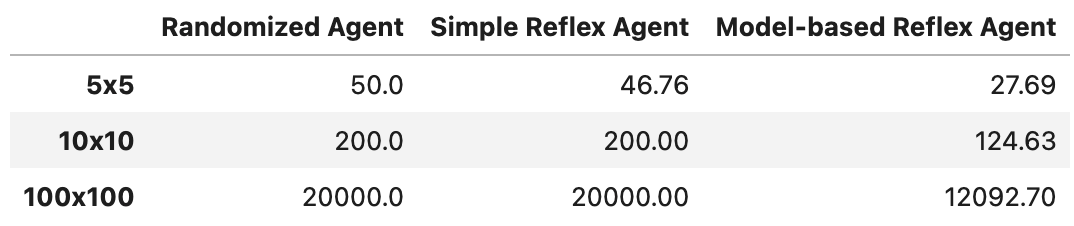

In [ ]:
from IPython import display
display.Image("../Agents/table_charts/performance mesure.png")

Fill out the following table with the average performance measure for 100 random runs (you may also create this table with code):

| Size     | Randomized Agent | Simple Reflex Agent | Model-based Reflex Agent |
|----------|------------------|---------------------|--------------------------|
| 5x5     |50.0 |46.76 |27.69 |
| 10x10   |200.0 |200.0 |124.63 |
| 100x100 |20000.0 |20000.0 |12092.70 |

Add charts to compare the performance of the different agents.

In [ ]:
# code for generating the charts
# set the room size, max steps
room_size = 5
#room_size = 10
#room_size = 100
max_steps = room_size * room_size * 2 
# record each agent's actions, cleaned sqaures and all cleaned squares in matrix
agent1_actions = []
agent1_cleaned = []
agent1_num_cleaned = []
agent2_actions = []
agent2_cleaned = []
agent2_num_cleaned = []
agent3_actions = []
agent3_cleaned = []
agent3_num_cleaned = []

# iterate through 100 runs
for i in range(100):
    # create random matrix
    random_room = create_randomized_room(room_size) 
    # run every agents and collect data
    agent1 = simple_environment(simple_randomized_agent, room_size, random_room, max_steps)
    agent1_actions.append(agent1[0])
    agent1_cleaned.append(agent1[1])
    agent1_num_cleaned.append(agent1[2])
    agent2 = simple_environment(simple_reflex_agent, room_size, random_room, max_steps)
    agent2_actions.append(agent2[0])
    agent2_cleaned.append(agent2[1])
    agent2_num_cleaned.append(agent2[2])
    agent3 = simple_environment(model_based_reflex_agent, room_size, random_room, max_steps)
    agent3_actions.append(agent3[0])
    agent3_cleaned.append(agent3[1])
    agent3_num_cleaned.append(agent3[2]) 

import matplotlib.pyplot as plt

# add a grid to the plots
import seaborn as sns 
sns.set(style="whitegrid")  

# change lists to sorted arrays
agent1_actions_array = np.array(agent1_actions)
agent1_cleaned_array = np.array(agent1_cleaned)
idx = np.argsort(agent1_actions_array)
X1 = agent1_actions_array[idx]
Y1 = agent1_cleaned_array[idx]
#print(X1, Y1)

agent2_actions_array = np.array(agent2_actions)
agent2_cleaned_array = np.array(agent2_cleaned)
idx = np.argsort(agent2_actions_array)
X2 = agent2_actions_array[idx]
Y2 = agent2_cleaned_array[idx]
#print(X2, Y2)

agent3_actions_array = np.array(agent3_actions)
agent3_cleaned_array = np.array(agent3_cleaned)
idx = np.argsort(agent3_actions_array)
X3 = agent3_actions_array[idx]
Y3 = agent3_cleaned_array[idx] 

# generate the chart
plt.plot(X1,Y1, label = "Randomized Agent") 
plt.plot(X2,Y2, label = "Simple Reflex Agent") 
plt.plot(X3,Y3, label = "Model-based Reflex Agent")  
#plt.axis([0, 50, 0, 25]) 
plt.xlabel("number of actions")
plt.ylabel("number of clear squares")
plt.title('performance curve - 5x5 room') 
#plt.title('performance curve - 10x10 room') 
#plt.title('performance curve - 100x100 room') 
plt.legend()
plt.show()

In [ ]:
# In a 5x5 room with a max step count of 50, the model base reflex agent can always clean all rooms between 0 and 40 moves.
# Compare to the randomized agent, the simple reflex agent can clean more squares in a maximum of 50 steps.
# While the randomized agent is within the maximum number of steps, it is more often unable to clear the entire room squares.
# As can be seen from the figure, the best performance is the model base reflex agent, followed by the simple reflex agent, and finally the randomized agent.

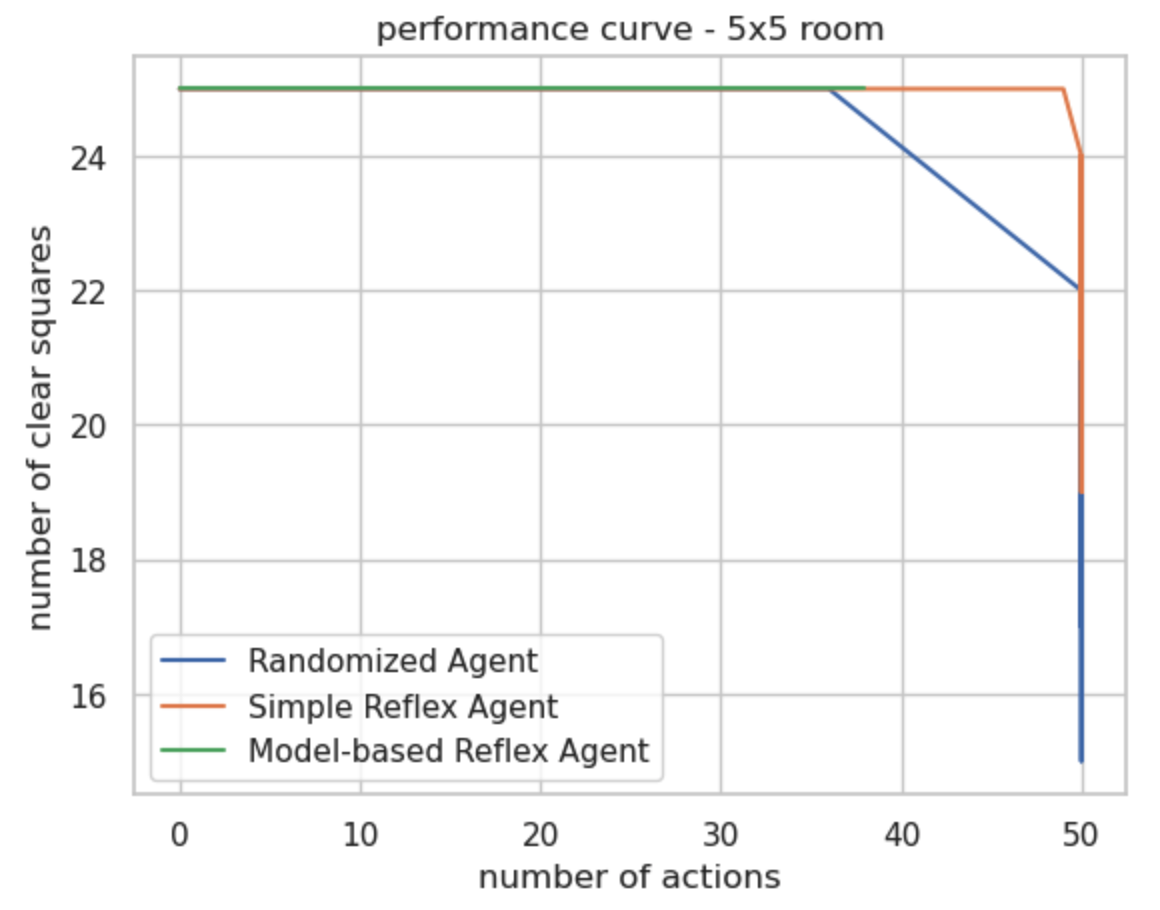

In [ ]:
from IPython import display
display.Image("../Agents/table_charts/5x5 chart.png")

In [ ]:
# In a 10x10 room with a max step count of 200, the model base reflex agent can always clean all rooms between 100 and 140 moves.
# Compare to the randomized agent, the simple reflex agent can clean more squares in a maximum of 200 steps. 
# But both radomized agent and simple reflex agent are unable to clear the entire room squares within the maximum number of steps.
# As can be seen from the figure, the best performance is the model base reflex agent, followed by the simple reflex agent, and finally the randomized agent.

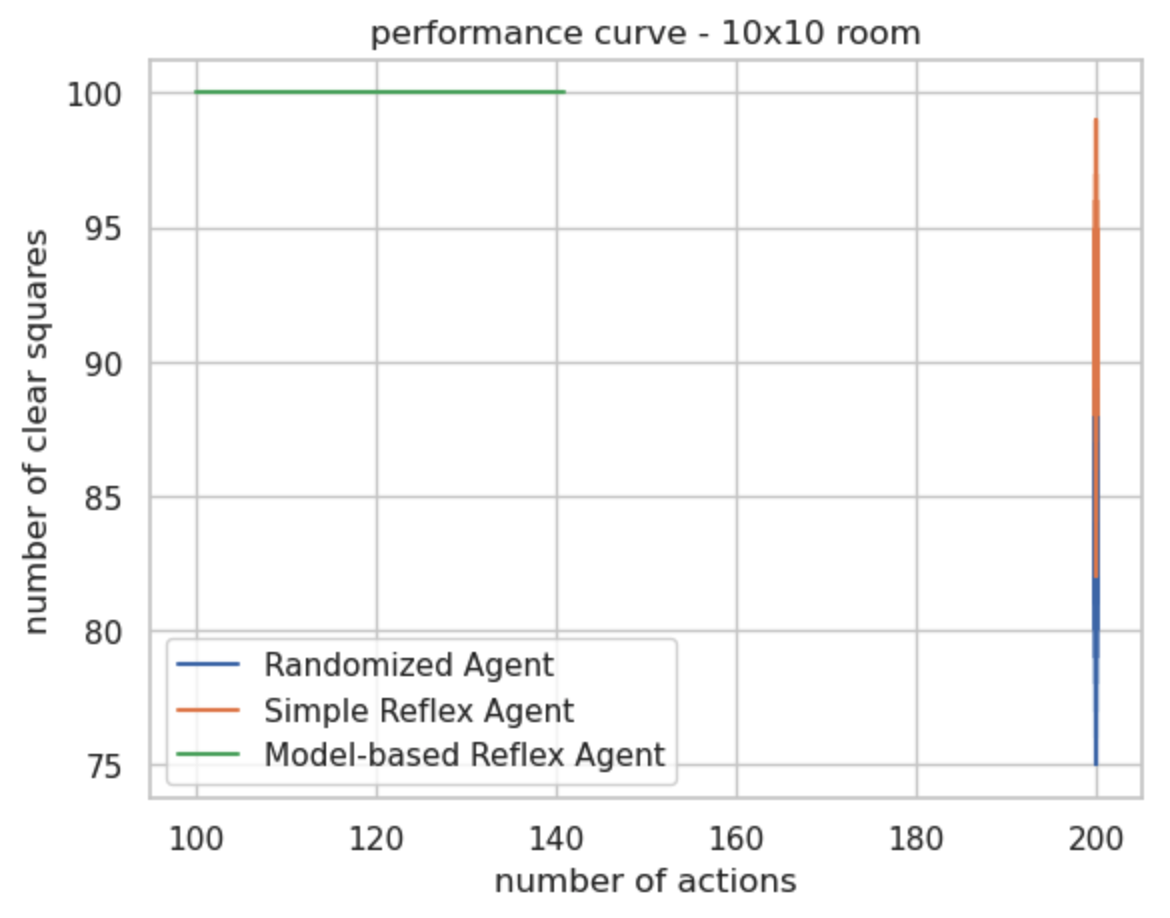

In [ ]:
from IPython import display
display.Image("../Agents/table_charts/10x10 chart.png")

In [ ]:
# In a 100x100 room with a max step count of 20000, the model base reflex agent can always clean all rooms between 12000 and 13000 moves.
# Compare to the randomized agent, the simple reflex agent can clean more squares in a maximum of 20000 steps. 
# But both radomized agent and simple reflex agent are unable to clear the entire room squares within the maximum number of steps.
# As can be seen from the figure, the best performance is the model base reflex agent, followed by the simple reflex agent, and finally the randomized agent.

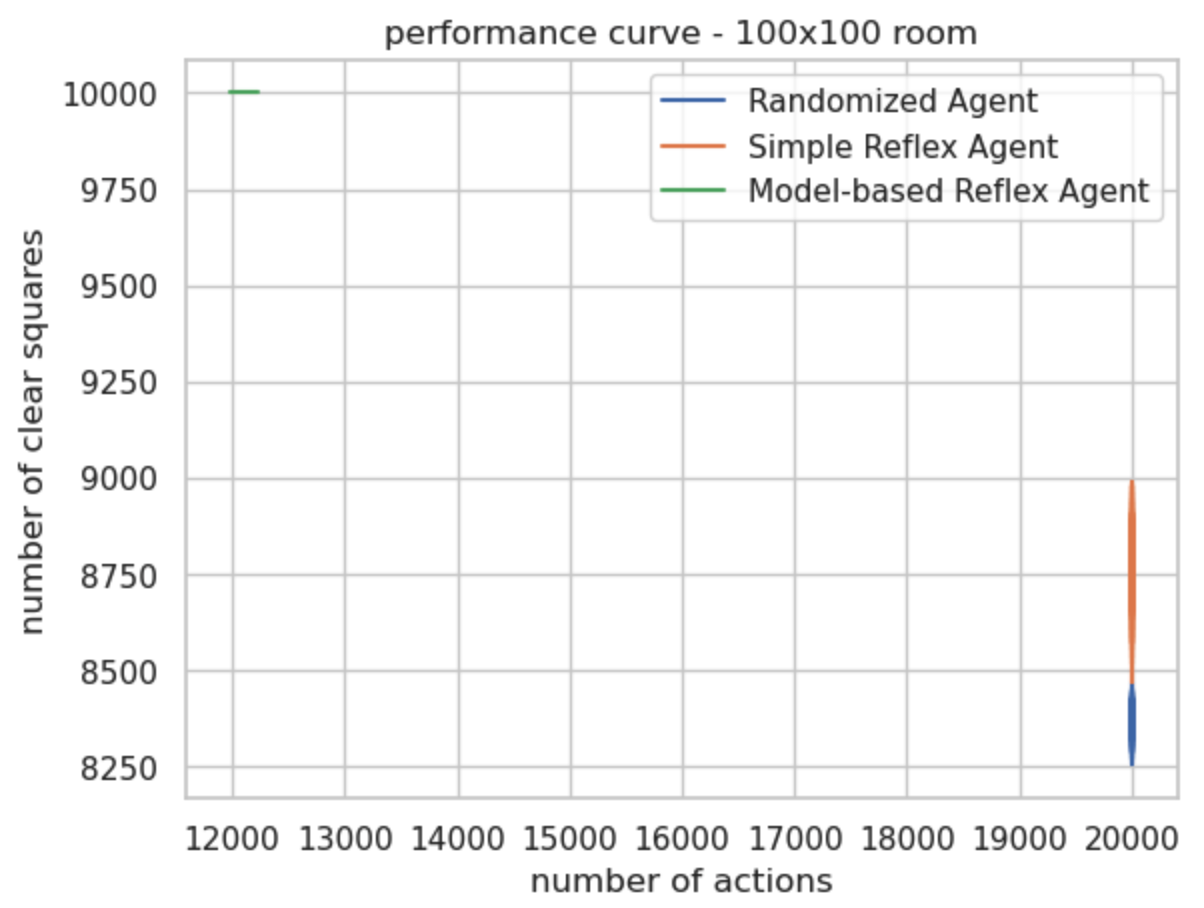

In [ ]:
from IPython import display
display.Image("../Agents/table_charts/100x100 chart.png")

## Task 5: Robustness of the agent implementations [10 Points] 

Describe how **your agent implementations** will perform 

* if it is put into a rectangular room with unknown size, 
* if the cleaning area can have an iregular shape (e.g., a hallway connecting two rooms), or 
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).

In [ ]:
# If the agents are put into a rectangular room with unknown size, the current enviornment cannot sense the bumpers. 
# If the agents cannot sense the bumpers, all agents will hit the wall.
# If the enviornment can sense the bumper, the randomized agent will randomly choose the action and will often hit the wall.
# The simple reflex agent walks randomly, but doesn't hit a wall. The model based agent can still reach to the top left corner and travel through all room spaces.

# If the cleaning area can have an irregular shape (for example, a hallway connecting two rooms), 
# the randomized agent will randomly choose the action and will often hit the wall. 
# The simple reflex agent walks randomly, but doesn't hit a wall. 
# The model based agent have difficulty reaching the correct upper left corner or cannot travel through all room spaces. 
# It might not be able to get into the hallway, or it might get stuck in some corners.

# If there is an obstacle in the room (i.e. an impassable obstacle and trigger the bumper sensor), 
# the randomized agent will randomly choose the action and will often hit the wall or obstacle. 
# The simple reflex agent walks randomly, but doesn't hit the wall and obstacle.
# The model based agent have difficulty getting to the correct upper left corner, or cannot pass through all room squares, or may get stuck due to obstacles.

## Graduate student advanced task: Obstacles [10 Points]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus Points].

1. Change your simulation environment tor run experiments for the following problem: Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. Observe how this changes the performance of the three implementations.

2. Describe what would need to be done to perform better with obstacles. Add code if you can. 

In [ ]:
# Your code and discussion goes here

## More advanced implementation tasks

* __Agent for and environment with obstacles:__ Implement an agent for an environment where the agent does not know how large the environment is (we assume it is rectangular), where it starts or where the obstacles are. An option would be to always move to the closest unchecked/uncleaned square (note that this is actualy depth-first search).

* __Utility-based agent:__ Change the environment for a $5 \times 5$ room, so each square has a fixed probability of getting dirty again. For the implementation, we give the environment a 2-dimensional array of probabilities. The utility of a state is defined as the number of currebntly clean squares in the room. Implement a utility-based agent that maximizes the expected utility over one full charge which lasts for 100000 time steps. To do this, the agent needs to learn the probabilities with which different squares get dirty again. This is very tricky!

In [ ]:
# Your ideas/code